In [1]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.style.use('ggplot')

# 1. Supervised, Semi-Supervised, and Unsupervised Learning

## 1.(a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set

In [2]:
# define paths of relative files
wdbc_data_path = "../data/wdbc.data.txt"
wdbc_name_path = "../data/wdbc.name.txt"

# read data set and make 
wdbc_data = pd.read_csv(wdbc_data_path, header=None)
wdbc_data.columns = ['id', 'label'] + ['feat%d'%i for i in range(1, wdbc_data.shape[1] - 2 + 1)]
wdbc_data.replace({'B' : 0, 'M' : 1}, inplace=True)

In [3]:
wdbc_data

,id,label,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
wdbc_data['label'].value_counts()

0    357
1    212
Name: label, dtype: int64

In [5]:
def splitData(data, random_state, test_size=0.2):
    # split the data
    np.random.seed(random_state)
    
    # select 20% from benign samples
    b_idx, = np.where(data['label'] == 0)
    b_test_num = round(len(b_idx) * test_size)
    b_test_idx = np.random.choice(b_idx, b_test_num, replace=False)
    
    # select 20% of malignant
    m_idx, = np.where(data['label'] == 1)
    m_test_num = round(len(m_idx) * test_size)
    m_test_idx = np.random.choice(m_idx, m_test_num, replace=False)
    
    # get overall index for both training and test set
    test_idx = np.concatenate([b_test_idx, m_test_idx])
    train_idx = np.array([i for i in range(data.shape[0]) if i not in test_idx])
    
    # split data by indexing
    trainX = data.iloc[train_idx, 2:].copy()
    trainY = data.iloc[train_idx, 1].copy()
    testX = data.iloc[test_idx, 2:].copy()
    testY = data.iloc[test_idx, 1].copy()
    
    return trainX, trainY, testX, testY

In [6]:
wdbc_trainX, wdbc_trainY, wdbc_testX, wdbc_testY = splitData(wdbc_data, random_state=0)

In [7]:
wdbc_trainX

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820


In [8]:
wdbc_trainY.value_counts()

0    286
1    170
Name: label, dtype: int64

In [9]:
wdbc_testX

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,feat9,feat10,...,feat21,feat22,feat23,feat24,feat25,feat26,feat27,feat28,feat29,feat30
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,...,15.15,31.82,99.00,698.8,0.1162,0.17110,0.228200,0.128200,0.2871,0.06917
285,12.580,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,0.1697,0.05855,...,13.50,23.08,85.56,564.1,0.1038,0.06624,0.005579,0.008772,0.2505,0.06431
495,14.870,20.21,96.12,680.9,0.09587,0.08345,0.06824,0.049510,0.1487,0.05748,...,16.01,28.48,103.90,783.6,0.1216,0.13880,0.170000,0.101700,0.2369,0.06599
391,8.734,16.84,55.27,234.3,0.10390,0.07428,0.00000,0.000000,0.1985,0.07098,...,10.17,22.80,64.01,317.0,0.1460,0.13100,0.000000,0.000000,0.2445,0.08865
187,11.710,17.19,74.68,420.3,0.09774,0.06141,0.03809,0.032390,0.1516,0.06095,...,13.01,21.39,84.42,521.5,0.1323,0.10400,0.152100,0.109900,0.2572,0.07097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,18.490,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.091830,0.1832,0.06697,...,22.75,22.88,146.40,1600.0,0.1412,0.30890,0.353300,0.166300,0.2510,0.09445
352,25.730,17.46,174.20,2010.0,0.11490,0.23630,0.33680,0.191300,0.1956,0.06121,...,33.13,23.58,229.30,3234.0,0.1530,0.59370,0.645100,0.275600,0.3690,0.08815
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.149600,0.2395,0.07398,...,26.68,33.48,176.50,2089.0,0.1491,0.75840,0.678000,0.290300,0.4098,0.12840
91,15.370,22.76,100.20,728.2,0.09200,0.10360,0.11220,0.074830,0.1717,0.06097,...,16.43,25.84,107.50,830.9,0.1257,0.19970,0.284600,0.147600,0.2556,0.06828


In [10]:
wdbc_testY.value_counts()

0    71
1    42
Name: label, dtype: int64

## 1.(b) Monte-Carlo Simulation

In [11]:
from sklearn.preprocessing import Normalizer

def normalizeData(trainX, testX):
    scaler = Normalizer()
    norm_trainX = scaler.fit_transform(trainX)
    norm_testX = scaler.transform(testX)
    return norm_trainX, norm_testX

In [12]:
result_summaries = {}

### 1.(b)-i Supervised Learning

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc

"""
Doc reference；
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
"""

def evalMetrics(ground_truth, predict, prob, report):
    acc = report['accuracy']
    fpr, tpr, thresholds = roc_curve(ground_truth, prob, pos_label=1)
    roc_auc = round(auc(fpr, tpr), 4)
    return {
        'acc' : acc,
        'precision' : report['weighted avg']['precision'],
        'recall' : report['weighted avg']['recall'],
        'f1-score' : report['weighted avg']['f1-score'],
        'auc' : roc_auc
    }

def modelSummary(ground_truth, predict, prob, report, title):
    conf_mat = confusion_matrix(ground_truth, predict)
    print("The confusion for {} set is \n{}".format(title, conf_mat))
    acc = report['accuracy']
    print("The classification accuracy is %0.4f" % acc)
    fpr, tpr, thresholds = roc_curve(ground_truth, prob, pos_label=1)
    roc_auc = round(auc(fpr, tpr), 4)
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
    axes.plot([0, 1], [0, 1], "--")
    axes.set_xlabel("False Positive Rate")
    axes.set_ylabel("True Positive Rate")
    axes.legend()
    axes.set_title("ROC curves of {} set".format(title))
    plt.show()

In [14]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

"""
Doc refrence:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_grid_search_digits.html
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV.fit
https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
"""

def MonteCarloSupervisedSVM(data, n):
    # create grid of tuned parameter
    tuned_params = {'C' : np.logspace(-2, 7, 20)}
    
    # some general settings of grid search
    settings = {
        'param_grid' : tuned_params, 
        'scoring' : 'f1_weighted',
        'n_jobs' : -1,
        'verbose' : 0
    }
    
    train_resdf = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    test_resdf = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    
    for i in range(n):
        # randomly split data
        trainX, trainY, testX, testY = splitData(data, random_state=i)
        
        # normalize training/test data
        trainX, testX = normalizeData(trainX, testX)
        
        # create a data splitter for 5-fold cross-validation
        settings['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
        #splitter = KFold(5, shuffle=True)
        
        # build and fit the grid search for given classifier
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        clf.fit(trainX, trainY)
        
        # predict and evaluate the model
        # training
        trainPredY_prob = clf.decision_function(trainX)
        trainPredY = clf.predict(trainX)
        trainReport = classification_report(trainY, trainPredY, output_dict=True)
        tmp_train_res = evalMetrics(trainY, trainPredY, trainPredY_prob, trainReport)
        train_resdf = train_resdf.append(tmp_train_res, ignore_index=True)
        
        # test
        testPredY_prob = clf.decision_function(testX)
        testPredY = clf.predict(testX)
        testReport = classification_report(testY, testPredY, output_dict=True)
        tmp_test_res = evalMetrics(testY, testPredY, testPredY_prob, testReport)
        test_resdf = test_resdf.append(tmp_test_res, ignore_index=True)
        
        # output the best option
        print("Attempt {} ~ Train acc : {:.4f}, Test acc : {:.4f}".format(i+1, trainReport['accuracy'],
                                                                            testReport['accuracy']))
        print("The best parameter setting is:")
        print(clf.best_params_, "\n")
    
    print('-' * 80)
    print('\nDetail report of 30th run of Monte-Calo\n')
    
    # report the detail of last run (30th) and plot ROC curve
    # training
    modelSummary(trainY, trainPredY, trainPredY_prob, trainReport, 'training')
    # test
    modelSummary(testY, testPredY, testPredY_prob, testReport, 'test')
    
    # average metrics
    train_resdf = train_resdf.apply(lambda x: x.mean(), axis=0)
    test_resdf = test_resdf.apply(lambda x: x.mean(), axis=0)
    print('\nSummary of average metrics')
    print('-' * 60)
    summary = pd.concat([train_resdf, test_resdf], axis=1)
    summary = summary.T
    summary = summary.set_index(pd.Series(['training', 'test']))
    print(summary)
    return summary
    

Attempt 1 ~ Train acc : 0.9956, Test acc : 0.9646
The best parameter setting is:
{'C': 127427.49857031321} 

Attempt 2 ~ Train acc : 0.9759, Test acc : 0.9558
The best parameter setting is:
{'C': 1623.776739188721} 

Attempt 3 ~ Train acc : 0.9759, Test acc : 0.9204
The best parameter setting is:
{'C': 1623.776739188721} 

Attempt 4 ~ Train acc : 0.9890, Test acc : 0.9646
The best parameter setting is:
{'C': 14384.498882876629} 

Attempt 5 ~ Train acc : 0.9978, Test acc : 0.9558
The best parameter setting is:
{'C': 42813.32398719387} 

Attempt 6 ~ Train acc : 0.9868, Test acc : 0.9469
The best parameter setting is:
{'C': 14384.498882876629} 

Attempt 7 ~ Train acc : 0.9781, Test acc : 0.9646
The best parameter setting is:
{'C': 14384.498882876629} 

Attempt 8 ~ Train acc : 0.9846, Test acc : 0.9558
The best parameter setting is:
{'C': 42813.32398719387} 

Attempt 9 ~ Train acc : 0.9912, Test acc : 0.9735
The best parameter setting is:
{'C': 10000000.0} 

Attempt 10 ~ Train acc : 0.9737

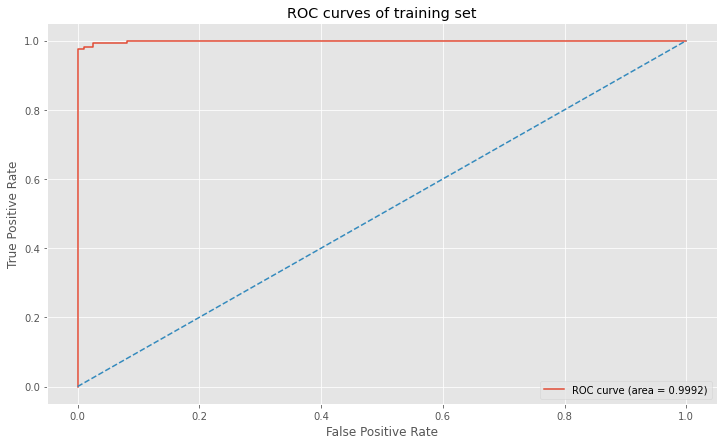

The confusion for test set is 
[[69  2]
 [ 4 38]]
The classification accuracy is 0.9469


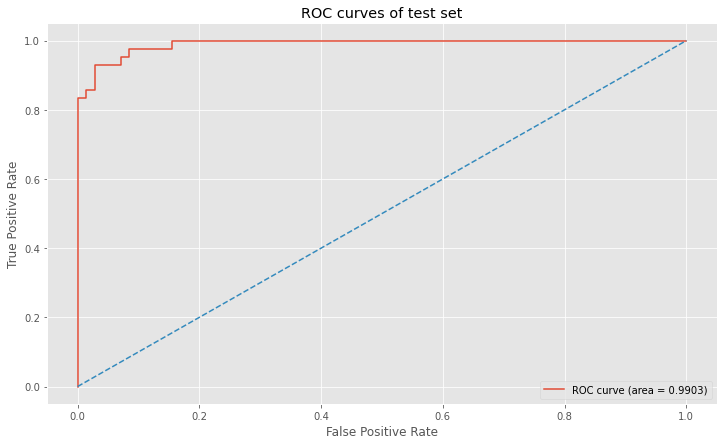


Summary of average metrics
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.983699   0.983732  0.983699  0.983677  0.998647
test      0.960767   0.961205  0.960767  0.960675  0.988443


In [16]:
result_summaries['Supervised'] = MonteCarloSupervisedSVM(wdbc_data, 30)

### 1.(b)-ii Semi-Supervised Learning / Self-training

In [17]:
def SemiSupervisedSVM(trainX, trainY, settings):
    labeled_idx = []
    
    for c in [0, 1]:
        c_idx, = np.where(trainY == c)
        idx_num = round(len(c_idx) * 0.5)
        select_idx = np.random.choice(c_idx, idx_num, replace=False)
        labeled_idx.extend(select_idx)
    
    unlabeled_idx = [i for i in range(len(trainX)) if i not in labeled_idx]
    
    labeledX = trainX[labeled_idx].tolist()
    labeledY = trainY.iloc[labeled_idx].tolist()
    
    unlabeledX = trainX[unlabeled_idx].tolist()
    unlabeledY = trainY.iloc[unlabeled_idx].to_numpy().tolist()
    
    # find the best parameter with given 50% data
    clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
    clf.fit(labeledX, labeledY)
    
    while len(unlabeledX) > 0:
        # calculate distance from unlabeled data points to decision boundary
        scores = clf.decision_function(unlabeledX)
        # sort by the absolute value of score
        sorted_idx = sorted([i for i in range(len(unlabeledX))], 
                            key=lambda x : abs(scores[x]))
        #print(sorted_idx)
        unlabeledX = [unlabeledX[i] for i in sorted_idx]
        unlabeledY = [unlabeledY[i] for i in sorted_idx]
        
        # remove the farest point from unlabeled and add it to labeled
        labeledX.append(unlabeledX.pop())
        labeledY.append(unlabeledY.pop())
        
        # refit the SVC
        clf.best_estimator_.fit(labeledX, labeledY)
    
    return clf

In [18]:
def MonteCarloSemiSupervisedSVM(data, n):
    # create grid of tuned parameter
    tuned_params = {'C' : np.logspace(-2, 7, 10)}
    
    # some general settings of grid search
    settings = {
        'param_grid' : tuned_params, 
        'scoring' : 'f1_weighted',
        'n_jobs' : -1,
        'verbose' : 0
    }
    
    train_resdf = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    test_resdf = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    
    for i in range(n):
        # randomly split data
        trainX, trainY, testX, testY = splitData(data, random_state=i, test_size=0.2)
        
        # normalize training/test data
        trainX, testX = normalizeData(trainX, testX)
        
        # build and fit the grid search for given classifier
        clf = SemiSupervisedSVM(trainX, trainY, settings)
        
        # predict and evaluate the model
        # training
        trainPredY_prob = clf.decision_function(trainX)
        trainPredY = clf.predict(trainX)
        trainReport = classification_report(trainY, trainPredY, output_dict=True)
        tmp_train_res = evalMetrics(trainY, trainPredY, trainPredY_prob, trainReport)
        train_resdf = train_resdf.append(tmp_train_res, ignore_index=True)
        
        # test
        testPredY_prob = clf.decision_function(testX)
        testPredY = clf.predict(testX)
        testReport = classification_report(testY, testPredY, output_dict=True)
        tmp_test_res = evalMetrics(testY, testPredY, testPredY_prob, testReport)
        test_resdf = test_resdf.append(tmp_test_res, ignore_index=True)
        
        # output the best option
        print("Attempt {} ~ Train acc : {:.4f}, Test acc : {:.4f}".format(i+1, trainReport['accuracy'],
                                                                            testReport['accuracy']))
        print("The best parameter setting is:")
        print(clf.best_params_, "\n")
    
    print('-' * 80)
    print('\nDetail report of 30th run of Monte-Calo\n')
    
    # report the detail of last run (30th)
    # training
    modelSummary(trainY, trainPredY, trainPredY_prob, trainReport, 'training')
    # test
    modelSummary(testY, testPredY, testPredY_prob, testReport, 'test')
    
    # average metrics
    train_resdf = train_resdf.apply(lambda x: x.mean(), axis=0)
    test_resdf = test_resdf.apply(lambda x: x.mean(), axis=0)
    print('\nSummary of average metrics')
    print('-' * 60)
    summary = pd.concat([train_resdf, test_resdf], axis=1)
    summary = summary.T
    summary = summary.set_index(pd.Series(['training', 'test']))
    print(summary)
    return summary

Attempt 1 ~ Train acc : 0.9956, Test acc : 0.9735
The best parameter setting is:
{'C': 10000000.0} 

Attempt 2 ~ Train acc : 0.9781, Test acc : 0.9735
The best parameter setting is:
{'C': 10000.0} 

Attempt 3 ~ Train acc : 0.9890, Test acc : 0.9469
The best parameter setting is:
{'C': 10000.0} 

Attempt 4 ~ Train acc : 0.9956, Test acc : 0.9646
The best parameter setting is:
{'C': 100000.0} 

Attempt 5 ~ Train acc : 0.9890, Test acc : 0.9646
The best parameter setting is:
{'C': 10000.0} 

Attempt 6 ~ Train acc : 0.9846, Test acc : 0.9469
The best parameter setting is:
{'C': 10000.0} 

Attempt 7 ~ Train acc : 0.9781, Test acc : 0.9646
The best parameter setting is:
{'C': 100000.0} 

Attempt 8 ~ Train acc : 0.9846, Test acc : 0.9558
The best parameter setting is:
{'C': 100000.0} 

Attempt 9 ~ Train acc : 0.9868, Test acc : 0.9646
The best parameter setting is:
{'C': 10000.0} 

Attempt 10 ~ Train acc : 0.9715, Test acc : 1.0000
The best parameter setting is:
{'C': 10000.0} 

Attempt 11 ~ 

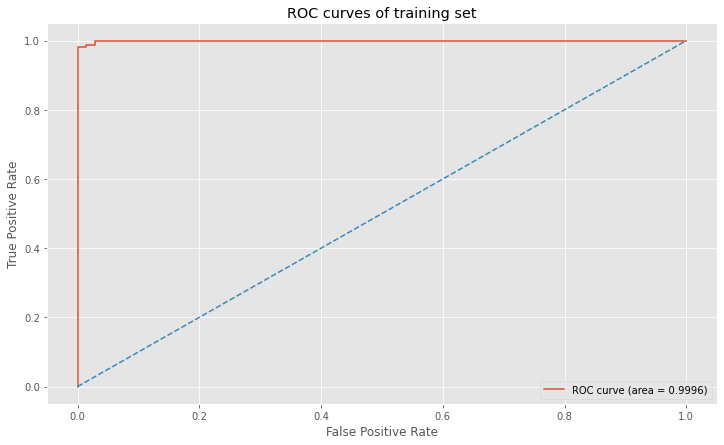

The confusion for test set is 
[[69  2]
 [ 5 37]]
The classification accuracy is 0.9381


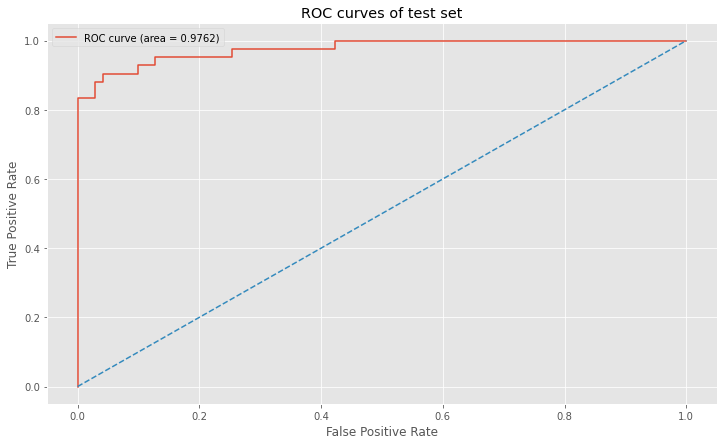


Summary of average metrics
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.983187   0.983207  0.983187  0.983163  0.998620
test      0.959292   0.959808  0.959292  0.959144  0.987747


In [19]:
result_summaries['semi-supervised'] = MonteCarloSemiSupervisedSVM(wdbc_data, 30)

### 1.(b)-iii Unsupervised Learning

To avoid being trapped in a local minimum, we can set the number of iterations

In [20]:
from scipy.special import softmax

def getDistance(centers, X, cluster_label):
    '''
    @params
        clusterer: a fitted clusterer
        X: (n_samples, n_features) data points
        cluster_label: the clustering result from clusterer
    @return
        dist : (n_samples, ) distance to corresponding center
        prob : (n_samples, 2) probability to be claasified as cluster i (0 or 1)
    '''
    dist = np.ndarray((X.shape[0],))
    proba = np.ndarray((X.shape[0], 2))
    for i, x in enumerate(X):
        center = centers[cluster_label[i]]
        dist[i] = np.linalg.norm(x - center)
        proba[i, 0] = np.linalg.norm(x - centers[0])
        proba[i, 1] = np.linalg.norm(x - centers[1])
    
    #proba = np.apply_along_axis(lambda x : np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x))), 1, proba).astype(np.float64)
    proba = softmax(proba, axis=1).astype(np.float64)
    return dist, proba
    #return dist, 1 / proba[:, 0]

def getMajority(X, cluster_label, dist, Y):
    '''
    @params
        X : (n_samples, n_features) data points
        cluster_label : the clustering result from clusterer
        dist : (n_samples, ) distance to corresponding center
        Y : (n_samples, ) ground-truth label
    @return
        label2cluster : (n_labels, ) mapping from label to cluster
        major_label : (n_samples, ) the predicted label for each sample
    '''
    label2cluster = np.ndarray((2,), dtype='int')
    major_label = cluster_label.copy()
    for cluster in [0, 1]:
        sample_idx, = np.where(cluster_label == cluster)
        top30 = sorted(sample_idx.tolist(), key=lambda i : dist[i])[:30]
        majority = Y.iloc[top30].value_counts().index[0]
        major_label[sample_idx] = majority
        label2cluster[majority] = cluster
    return label2cluster, major_label

In [21]:
from sklearn.cluster import KMeans

def MonteCarloKmeans(data, n):
    train_resdf = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    test_resdf = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    for i in range(n):
        # randomly split data
        trainX, trainY, testX, testY = splitData(data, random_state=i, test_size=0.2)
        
        # normalize training/test data
        trainX, testX = normalizeData(trainX, testX)
        
        # create k-means clusters
        clusterer = KMeans(n_clusters=2, n_init = 15, random_state=i).fit(trainX)
        
        # predict and evaluate the model
        # training
        train_cluster_label = clusterer.predict(trainX)
        dist, trainPredY_prob = getDistance(clusterer.cluster_centers_, trainX, train_cluster_label)
        label2cluster, trainPredY = getMajority(trainX, train_cluster_label, dist, trainY)
        '''
        ATTENTION!!! Here, label 0 is treated as the positive case here
        We should get the corresponding cluster to obverve the probability.
        '''
        pos_cluster = label2cluster[0]
        trainPredY_prob = trainPredY_prob[:, pos_cluster]
        trainReport = classification_report(trainY, trainPredY, output_dict=True)
        tmp_train_res = evalMetrics(trainY, trainPredY, trainPredY_prob, trainReport)
        train_resdf = train_resdf.append(tmp_train_res, ignore_index=True)
        
        # test
        test_cluster_label = clusterer.predict(testX)
        dist, testPredY_prob = getDistance(clusterer.cluster_centers_, testX, test_cluster_label)
        label2cluster, testPredY = getMajority(testX, test_cluster_label, dist, testY)
        pos_cluster = label2cluster[0]
        testPredY_prob = testPredY_prob[:, pos_cluster]
        testReport = classification_report(testY, testPredY, output_dict=True)
        tmp_test_res = evalMetrics(testY, testPredY, testPredY_prob, testReport)
        test_resdf = test_resdf.append(tmp_test_res, ignore_index=True)
        
        # log information
        print("Attempt {} ~ Train acc : {:.4f}, Test acc : {:.4f}".format(i+1, trainReport['accuracy'],
                                                                            testReport['accuracy']))
    
    print('-' * 80)
    print('\nDetail report of 30th run of Monte-Calo\n')
    
    # report the detail of last run (30th)
    # training
    modelSummary(trainY, trainPredY, trainPredY_prob, trainReport, 'training')
    # test
    modelSummary(testY, testPredY, testPredY_prob, testReport, 'test')
    
    # average metrics
    train_resdf = train_resdf.apply(lambda x: x.mean(), axis=0)
    test_resdf = test_resdf.apply(lambda x: x.mean(), axis=0)
    print('\nSummary of average metrics')
    print('-' * 60)
    summary = pd.concat([train_resdf, test_resdf], axis=1)
    summary = summary.T
    summary = summary.set_index(pd.Series(['training', 'test']))
    print(summary)
    return summary

Attempt 1 ~ Train acc : 0.8882, Test acc : 0.8761
Attempt 2 ~ Train acc : 0.8706, Test acc : 0.9558
Attempt 3 ~ Train acc : 0.8969, Test acc : 0.8496
Attempt 4 ~ Train acc : 0.8860, Test acc : 0.9115
Attempt 5 ~ Train acc : 0.8991, Test acc : 0.8761
Attempt 6 ~ Train acc : 0.8860, Test acc : 0.8673
Attempt 7 ~ Train acc : 0.8794, Test acc : 0.8938
Attempt 8 ~ Train acc : 0.8860, Test acc : 0.8673
Attempt 9 ~ Train acc : 0.8904, Test acc : 0.8584
Attempt 10 ~ Train acc : 0.8794, Test acc : 0.8938
Attempt 11 ~ Train acc : 0.8925, Test acc : 0.8761
Attempt 12 ~ Train acc : 0.8794, Test acc : 0.9115
Attempt 13 ~ Train acc : 0.8816, Test acc : 0.9027
Attempt 14 ~ Train acc : 0.8882, Test acc : 0.8938
Attempt 15 ~ Train acc : 0.8969, Test acc : 0.8496
Attempt 16 ~ Train acc : 0.8772, Test acc : 0.9027
Attempt 17 ~ Train acc : 0.9013, Test acc : 0.8319
Attempt 18 ~ Train acc : 0.8838, Test acc : 0.9115
Attempt 19 ~ Train acc : 0.8860, Test acc : 0.8850
Attempt 20 ~ Train acc : 0.8991, Test ac

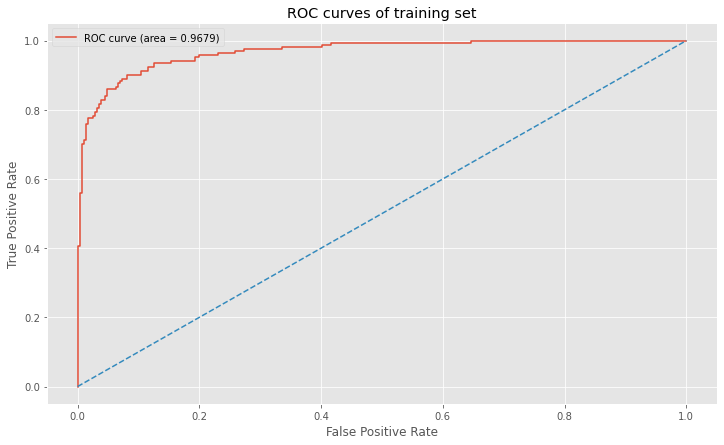

The confusion for test set is 
[[70  1]
 [17 25]]
The classification accuracy is 0.8407


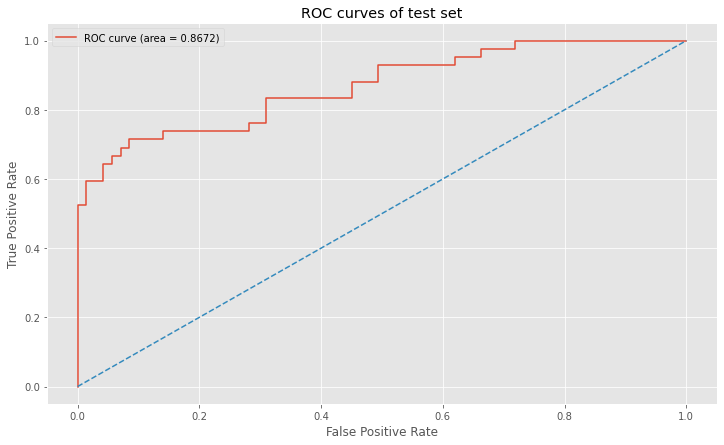


Summary of average metrics
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.887939   0.896705  0.887939  0.884063  0.950730
test      0.882301   0.894138  0.882301  0.877143  0.945873


In [22]:
result_summaries['Unsupervised-KMeans'] = MonteCarloKmeans(wdbc_data, 30)

### 1.(b)-iv Spectral Clustering

In [23]:
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import KNeighborsClassifier

def MonteCarloSpectral(data, n):
    train_resdf = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    test_resdf = pd.DataFrame(columns=['acc', 'precision', 'recall', 'f1-score', 'auc'])
    for i in range(n):
        # randomly split data
        trainX, trainY, testX, testY = splitData(data, random_state=i, test_size=0.2)
        
        # normalize training/test data
        trainX, testX = normalizeData(trainX, testX)
        
        # create k-means clusters
        cluster_label = SpectralClustering(n_clusters=2, assign_labels='kmeans', 
                                    affinity='rbf', eigen_tol = 1e-2, 
                                    eigen_solver = 'arpack', 
                                    random_state=0).fit_predict(trainX)
        cluster_centers = []
        for clus in [0,1]:
            cluster_centers.append(np.mean(trainX[cluster_label==clus], axis = 0).tolist())
        
        # build a KNN classifier
        knn = KNeighborsClassifier(n_neighbors=1)
        knn.fit(trainX, cluster_label)
        
        # predict and evaluate the model
        # training
        train_cluster_label = knn.predict(trainX)
        dist, trainPredY_prob = getDistance(cluster_centers, trainX, train_cluster_label)
        label2cluster, trainPredY = getMajority(trainX, train_cluster_label, dist, trainY)
        '''
        ATTENTION!!! Here, label 0 is treated as the positive case here
        We should get the corresponding cluster to obverve the probability.
        '''
        pos_cluster = label2cluster[0]
        trainPredY_prob = trainPredY_prob[:, pos_cluster]
        trainReport = classification_report(trainY, trainPredY, output_dict=True)
        tmp_train_res = evalMetrics(trainY, trainPredY, trainPredY_prob, trainReport)
        train_resdf = train_resdf.append(tmp_train_res, ignore_index=True)
        
        # test
        test_cluster_label = knn.predict(testX)
        dist, testPredY_prob = getDistance(cluster_centers, testX, test_cluster_label)
        label2cluster, testPredY = getMajority(testX, test_cluster_label, dist, testY)
        pos_cluster = label2cluster[0]
        testPredY_prob = testPredY_prob[:, pos_cluster]
        testReport = classification_report(testY, testPredY, output_dict=True)
        tmp_test_res = evalMetrics(testY, testPredY, testPredY_prob, testReport)
        test_resdf = test_resdf.append(tmp_test_res, ignore_index=True)
        
        # log information
        print("Attempt {} ~ Train acc : {:.4f}, Test acc : {:.4f}".format(i+1, trainReport['accuracy'],
                                                                            testReport['accuracy']))
    
    print('-' * 80)
    print('\nDetail report of 30th run of Monte-Calo\n')
    
    # report the detail of last run (30th)
    # training
    modelSummary(trainY, trainPredY, trainPredY_prob, trainReport, 'training')
    # test
    modelSummary(testY, testPredY, testPredY_prob, testReport, 'test')
    
    # average metrics
    train_resdf = train_resdf.apply(lambda x: x.mean(), axis=0)
    test_resdf = test_resdf.apply(lambda x: x.mean(), axis=0)
    print('\nSummary of average metrics')
    print('-' * 60)
    summary = pd.concat([train_resdf, test_resdf], axis=1)
    summary = summary.T
    summary = summary.set_index(pd.Series(['training', 'test']))
    print(summary)
    return summary

Attempt 1 ~ Train acc : 0.8860, Test acc : 0.8850
Attempt 2 ~ Train acc : 0.8684, Test acc : 0.9204
Attempt 3 ~ Train acc : 0.8925, Test acc : 0.8407
Attempt 4 ~ Train acc : 0.8794, Test acc : 0.8761
Attempt 5 ~ Train acc : 0.8838, Test acc : 0.8761
Attempt 6 ~ Train acc : 0.8838, Test acc : 0.8761
Attempt 7 ~ Train acc : 0.8728, Test acc : 0.8938
Attempt 8 ~ Train acc : 0.8838, Test acc : 0.8496
Attempt 9 ~ Train acc : 0.8860, Test acc : 0.8496
Attempt 10 ~ Train acc : 0.8772, Test acc : 0.8761
Attempt 11 ~ Train acc : 0.8904, Test acc : 0.8496
Attempt 12 ~ Train acc : 0.8794, Test acc : 0.8938
Attempt 13 ~ Train acc : 0.8794, Test acc : 0.8938
Attempt 14 ~ Train acc : 0.8794, Test acc : 0.8850
Attempt 15 ~ Train acc : 0.8925, Test acc : 0.8053
Attempt 16 ~ Train acc : 0.8728, Test acc : 0.8850
Attempt 17 ~ Train acc : 0.8947, Test acc : 0.8230
Attempt 18 ~ Train acc : 0.8816, Test acc : 0.9292
Attempt 19 ~ Train acc : 0.8838, Test acc : 0.8761
Attempt 20 ~ Train acc : 0.8925, Test ac

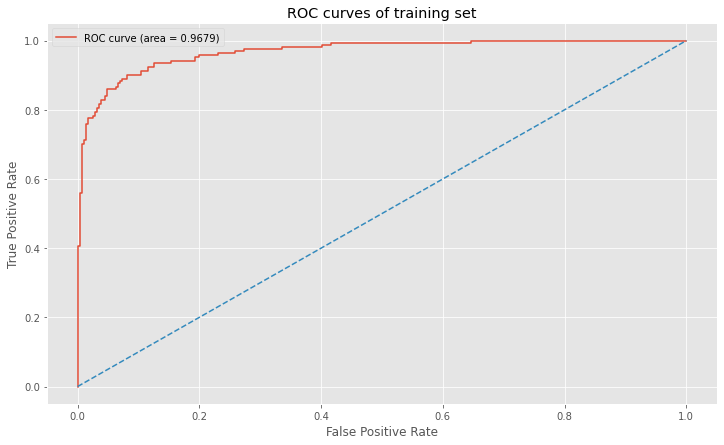

The confusion for test set is 
[[69  2]
 [18 24]]
The classification accuracy is 0.8230


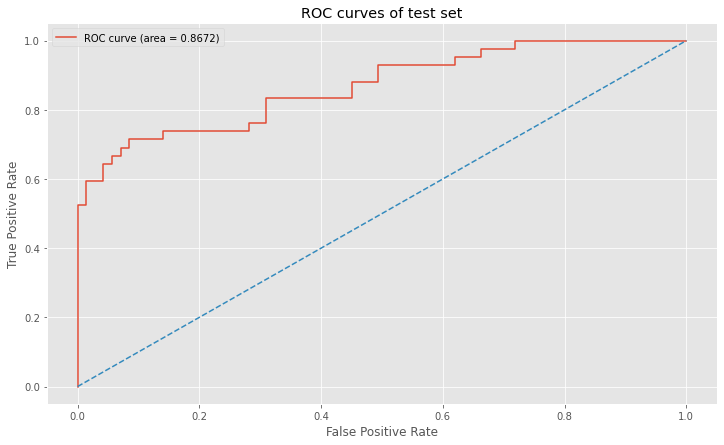


Summary of average metrics
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.882895   0.893003  0.882895  0.878464  0.950147
test      0.871681   0.885106  0.871681  0.865377  0.945257


In [24]:
result_summaries['Unsupervised - Spectral Clustering'] = MonteCarloSpectral(wdbc_data, 30)

### 1.(b)-v Compare the results you obtained by those methods

In [29]:
for k in result_summaries.keys():
    print('\n' + '-' * 60)
    print(k)
    print('-' * 60)
    print(result_summaries[k])


------------------------------------------------------------
Suppervised
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.983626   0.983661  0.983626  0.983603  0.998627
test      0.960177   0.960624  0.960177  0.960085  0.988697

------------------------------------------------------------
Supervised
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.983699   0.983732  0.983699  0.983677  0.998647
test      0.960767   0.961205  0.960767  0.960675  0.988443

------------------------------------------------------------
semi-supervised
------------------------------------------------------------
               acc  precision    recall  f1-score       auc
training  0.983187   0.983207  0.983187  0.983163  0.998620
test      0.959292   0.959808  0.959292  0.959144  0.987747

---------------------------------------------------

According to the performance report above, we can observe that the performance comparison of different training strategies is : supervised > semi-simpervised > unsupervised. The gap between supervised and semi-supaervised is sinificantly smaller than that between (semi-)supervised cases and unsupervised cases. Those supervised case will have more information of labels to guide their learning while the prediction of unsupervised ones is just based on the similarity of features.

# 2. Active Learning Using Support Vector Machines

## 2.(a) Data preparation

In [30]:
banknote_data_path = '../data/data_banknote_authentication.txt'

banknote_data = pd.read_csv(banknote_data_path, header = None)
banknote_data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

In [31]:
banknote_data

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [32]:
banknote_data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [33]:
test_idx = np.random.choice(banknote_data.shape[0], 472, replace=False)
train_idx = np.array([i for i in range(banknote_data.shape[0]) if i not in test_idx])
banknote_train = banknote_data.iloc[train_idx]
banknote_test = banknote_data.iloc[test_idx]

In [34]:
banknote_train

,variance,skewness,curtosis,entropy,class
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
5,4.36840,9.67180,-3.9606,-3.16250,0
7,2.09220,-6.81000,8.4636,-0.60216,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [35]:
banknote_test

,variance,skewness,curtosis,entropy,class
989,-6.75260,8.81720,-0.061983,-3.72500,1
765,-3.84830,-12.80470,15.682400,-1.28100,1
1036,-2.38980,-0.78427,3.014100,0.76205,1
268,0.92970,-3.79710,4.642900,-0.29570,0
1106,-0.12690,-1.15050,-0.951380,0.57843,1
...,...,...,...,...,...
1360,-0.24745,1.93680,-2.469700,-0.80518,1
274,5.27560,0.13863,0.121380,1.14350,0
509,-0.29510,9.04890,-0.527250,-2.07890,0
930,-2.22140,-0.23798,0.560080,0.05602,1


### 2.(b)-i Passive learning

In [36]:
def passiveLearning(trainX, trainY, testX, testY, settings):
    touse_idx = np.arange(trainX.shape[0])
    used_idx = []
    acc_list = []
    
    while len(touse_idx) > 0:
        # randomly get pool of 10 samples
        np.random.shuffle(touse_idx)
        pool, touse_idx = touse_idx[:10], touse_idx[10:]
        used_idx.extend(pool)
        
        # get new training set and apply cross-validation
        used_trainX, used_trainY = trainX[used_idx], trainY.iloc[used_idx]
        
        # build and fit the grid search for given classifier
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        clf.fit(used_trainX, used_trainY)
        
        # evaluate on test
        testPredY = clf.predict(testX)
        testReport = classification_report(testY, testPredY, output_dict=True)
        acc_list.append(testReport['accuracy'])
    
    return acc_list

def MonteCarloPassiveLearning(data, n):
    # create grid of tuned parameter
    tuned_params = {'C' : np.logspace(-2, 7, 20)}
    
    # some general settings of grid search
    settings = {
        'param_grid' : tuned_params, 
        'scoring' : 'f1_weighted',
        'n_jobs' : -1,
        'verbose' : 0
    }
    
    learning_curve = []
    
    for i in range(n):
        # randomly split data
        test_idx = np.random.choice(banknote_data.shape[0], 472, replace=False)
        train_idx = np.array([i for i in range(banknote_data.shape[0]) if i not in test_idx])
        
        train_set, test_set = data.iloc[train_idx], data.iloc[test_idx]
        trainX, trainY = train_set.iloc[:, :-1], train_set.iloc[:, -1]
        testX, testY = test_set.iloc[:, :-1], test_set.iloc[:, -1]
        
        # normalize training/test data
        trainX, testX = normalizeData(trainX, testX)
        
        # create a data splitter for 5-fold cross-validation
        settings['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
        
        # passive learning
        acc_list = passiveLearning(trainX, trainY, testX, testY, settings)
        learning_curve.append(acc_list)
        
        # output the best option
        print("Attempt {} ~ Test acc with 10 samples: {:.4f}, Test acc with 900 samples: {:.4f}".format(i+1, acc_list[0], acc_list[-1]))
    
    learning_curve = np.array(learning_curve)
    learning_curve = np.mean(learning_curve, axis=0)
    return learning_curve

In [37]:
passive_learning_curve = MonteCarloPassiveLearning(banknote_data, 50)

Attempt 1 ~ Test acc with 10 samples: 0.8496, Test acc with 900 samples: 0.9979
Attempt 2 ~ Test acc with 10 samples: 0.9131, Test acc with 900 samples: 0.9915
Attempt 3 ~ Test acc with 10 samples: 0.8263, Test acc with 900 samples: 0.9936
Attempt 4 ~ Test acc with 10 samples: 0.9258, Test acc with 900 samples: 0.9958
Attempt 5 ~ Test acc with 10 samples: 0.8326, Test acc with 900 samples: 0.9915
Attempt 6 ~ Test acc with 10 samples: 0.7733, Test acc with 900 samples: 0.9958
Attempt 7 ~ Test acc with 10 samples: 0.8517, Test acc with 900 samples: 0.9936
Attempt 8 ~ Test acc with 10 samples: 0.6419, Test acc with 900 samples: 0.9979
Attempt 9 ~ Test acc with 10 samples: 0.9195, Test acc with 900 samples: 0.9936
Attempt 10 ~ Test acc with 10 samples: 0.9576, Test acc with 900 samples: 0.9915
Attempt 11 ~ Test acc with 10 samples: 0.8559, Test acc with 900 samples: 0.9936
Attempt 12 ~ Test acc with 10 samples: 0.8898, Test acc with 900 samples: 0.9936
Attempt 13 ~ Test acc with 10 samples

### 2.(b)-i Active learning

In [38]:
def activeLearning(trainX, trainY, testX, testY, settings):
    touse_idx = np.arange(trainX.shape[0])
    used_idx = []
    acc_list = []
    
    # randomly get pool of 10 samples
    np.random.shuffle(touse_idx)
    pool, touse_idx = touse_idx[:10], touse_idx[10:]
    used_idx.extend(pool)
    
    while len(used_idx) <= 900:
        # get new training set and apply cross-validation
        used_trainX, used_trainY = trainX[used_idx], trainY.iloc[used_idx]
        
        # build and fit the grid search for given classifier
        clf = GridSearchCV(estimator=LinearSVC(penalty='l1', dual=False), **settings)
        clf.fit(used_trainX, used_trainY)
        
        # evaluate on test
        testPredY = clf.predict(testX)
        testReport = classification_report(testY, testPredY, output_dict=True)
        acc_list.append(testReport['accuracy'])
        
        if len(touse_idx) == 0:
            break
        
        # select the most closest 10 points
        dist = clf.decision_function(trainX[touse_idx])
        sortedarg = np.arange(len(touse_idx))
        sorted(sortedarg, key=lambda i : abs(dist[i]))
        touse_idx = touse_idx[sortedarg]
        pool, touse_idx = touse_idx[:10], touse_idx[10:]
        used_idx.extend(pool)
    
    
        
    return acc_list

def MonteCarloActiveLearning(data, n):
    # create grid of tuned parameter
    tuned_params = {'C' : np.logspace(-2, 7, 20)}
    
    # some general settings of grid search
    settings = {
        'param_grid' : tuned_params, 
        'scoring' : 'f1_weighted',
        'n_jobs' : -1,
        'verbose' : 0
    }
    
    learning_curve = []
    
    for i in range(n):
        # randomly split data
        test_idx = np.random.choice(banknote_data.shape[0], 472, replace=False)
        train_idx = np.array([i for i in range(banknote_data.shape[0]) if i not in test_idx])
        
        train_set, test_set = data.iloc[train_idx], data.iloc[test_idx]
        trainX, trainY = train_set.iloc[:, :-1], train_set.iloc[:, -1]
        testX, testY = test_set.iloc[:, :-1], test_set.iloc[:, -1]
        
        # normalize training/test data
        trainX, testX = normalizeData(trainX, testX)
        
        # create a data splitter for 5-fold cross-validation
        settings['cv'] = StratifiedKFold(5, random_state=i, shuffle=True)
        
        # passive learning
        acc_list = activeLearning(trainX, trainY, testX, testY, settings)
        learning_curve.append(acc_list)
        
        # output the best option
        print("Attempt {} ~ Test acc with 10 samples: {:.4f}, Test acc with 900 samples: {:.4f}".format(i+1, acc_list[0], acc_list[-1]))
    
    learning_curve = np.array(learning_curve)
    learning_curve = np.mean(learning_curve, axis=0)
    return learning_curve

In [39]:
active_learning_curve = MonteCarloActiveLearning(banknote_data, 50)

Attempt 1 ~ Test acc with 10 samples: 0.9597, Test acc with 900 samples: 0.9958
Attempt 2 ~ Test acc with 10 samples: 0.9852, Test acc with 900 samples: 0.9936
Attempt 3 ~ Test acc with 10 samples: 0.8453, Test acc with 900 samples: 0.9979
Attempt 4 ~ Test acc with 10 samples: 0.8581, Test acc with 900 samples: 0.9936
Attempt 5 ~ Test acc with 10 samples: 0.8686, Test acc with 900 samples: 0.9958
Attempt 6 ~ Test acc with 10 samples: 0.9788, Test acc with 900 samples: 0.9958
Attempt 7 ~ Test acc with 10 samples: 0.5784, Test acc with 900 samples: 0.9958
Attempt 8 ~ Test acc with 10 samples: 0.9894, Test acc with 900 samples: 0.9894
Attempt 9 ~ Test acc with 10 samples: 0.6504, Test acc with 900 samples: 0.9958
Attempt 10 ~ Test acc with 10 samples: 0.8729, Test acc with 900 samples: 0.9936
Attempt 11 ~ Test acc with 10 samples: 0.8771, Test acc with 900 samples: 0.9915
Attempt 12 ~ Test acc with 10 samples: 0.8072, Test acc with 900 samples: 0.9915
Attempt 13 ~ Test acc with 10 samples

In [40]:
def plotLearningCurve(passive, active):
    x = 10 * np.arange(1, 91)
    fig, axes = plt.subplots(figsize=(12, 7))
    axes.plot(x, 1 - passive, label='Passive')
    axes.plot(x, 1 - active, label='Active')
    axes.set_xlabel("Training Set size")
    axes.set_ylabel("Test Error")
    axes.legend()
    axes.set_title("Learning Curve")
    plt.show()

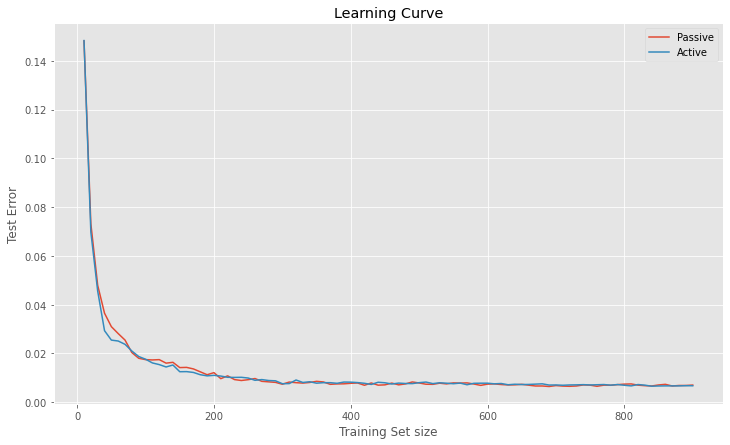

In [41]:
plotLearningCurve(passive_learning_curve, active_learning_curve)